**Analysis showing correlation between passing volume and shots on goal**

In [1]:
import json
from collections import Counter
import numpy as np
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

**Loading Raw Data** 

In [2]:
# loading the events data
events={}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('./events/events_%s.json' %nation) as json_data:
        events[nation] = json.load(json_data)
        
# loading the match data
matches={}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('./Matches/matches_%s.json' %nation) as json_data:
        matches[nation] = json.load(json_data)

# loading the players data
players={}
with open('./players.json') as json_data:
    players = json.load(json_data)

# loading the competitions data
competitions={}
with open('./competitions.json') as json_data:
    competitions = json.load(json_data)

**Shots at goal vs Passing volume function**

In [3]:
def passing_vol_vs_shots(country):
    matches_eng=pd.DataFrame.from_dict(matches[country])
    events_eng=pd.DataFrame.from_dict(events[country])
    passes_eng=np.empty([2*(matches_eng['wyId'].shape[0])-1,1])
    shots_eng=np.empty([2*(matches_eng['wyId'].shape[0])-1,1])
    for i in range((matches_eng['wyId'].shape[0]-1)):
        events_from_match=events_eng[(events_eng['matchId']==matches_eng['wyId'][i])]
        events_only_pass=events_from_match[(events_from_match['eventName']=='Pass')]
        events_only_shot=events_from_match[(events_from_match['eventName']=='Shot')]
        
        winner_passes_from_match=events_only_pass[(events_only_pass['teamId']==matches_eng['winner'][i])]
        loser_passes_from_match=events_only_pass[(events_only_pass['teamId']!=matches_eng['winner'][i])]
        winner_shots=events_only_shot[(events_only_shot['teamId']==matches_eng['winner'][i])]
        loser_shots=events_only_shot[(events_only_shot['teamId']!=matches_eng['winner'][i])]
        
        passes_eng[2*i]=winner_passes_from_match.shape[0]
        shots_eng[2*i]=winner_shots.shape[0]
        passes_eng[2*i+1]=loser_passes_from_match.shape[0]
        shots_eng[2*i+1]=loser_shots.shape[0]
        
    regressor_eng = LinearRegression()
    regressor_eng.fit(passes_eng, shots_eng)
    plt.scatter(passes_eng, shots_eng,color='black')
    plt.plot(passes_eng,regressor_eng.predict(passes_eng),color='red')
    plt.xlabel('Passes')
    plt.ylabel('Shots at goal')
    plt.title(country)
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(shots_eng, regressor_eng.predict(passes_eng))))
    print('Correlation Matrix:',np.corrcoef(np.transpose(passes_eng),np.transpose(shots_eng)))
    return passes_eng,shots_eng

**Shots at goal vs Passing accuracy across the four major Leagues**

Root Mean Squared Error: 4.282076333120177
Correlation Matrix: [[1.         0.82192442]
 [0.82192442 1.        ]]


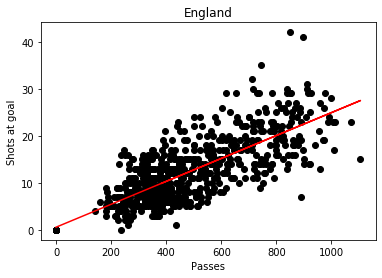

In [4]:
passes_england,shots_england=passing_vol_vs_shots('England')

Root Mean Squared Error: 4.314858664497725
Correlation Matrix: [[1.         0.80182168]
 [0.80182168 1.        ]]


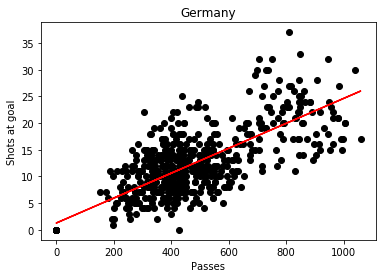

In [5]:
passes_ger,shots_ger=passing_vol_vs_shots('Germany')

Root Mean Squared Error: 4.609164922544029
Correlation Matrix: [[1.         0.77740073]
 [0.77740073 1.        ]]


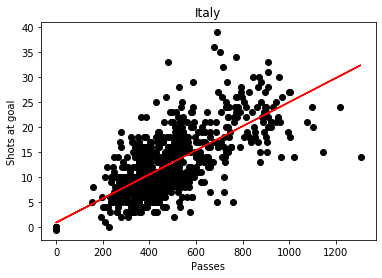

In [6]:
passes_it,shots_it=passing_vol_vs_shots('Italy')

Root Mean Squared Error: 4.077589813240634
Correlation Matrix: [[1.         0.78308541]
 [0.78308541 1.        ]]


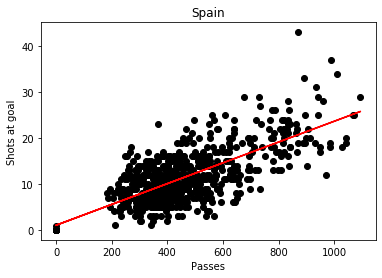

In [7]:
passes_es,shots_es=passing_vol_vs_shots('Spain')

Root Mean Squared Error: 4.2571484068705985
Correlation Matrix: [[1.         0.78502207]
 [0.78502207 1.        ]]


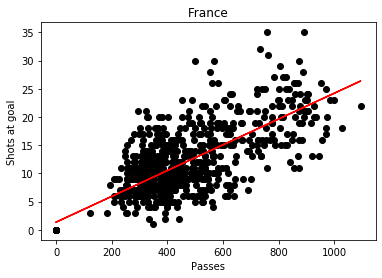

In [8]:
passes_fr,shots_fr=passing_vol_vs_shots('France')

**Clearly across the four major leagues, there is a strong correlation between the volume of passes and shots at goal. Passing networks will help us move forward from this simplistic analysis by considering the spatial location of these passes and how they affect the shots at goal by a team.**

Resources:

Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Sci Data 6, 236 (2019) doi:10.1038/s41597-019-0247-7, https://www.nature.com/articles/s41597-019-0247-7

Pappalardo, L., Cintia, P., Ferragina, P., Massucco, E., Pedreschi, D., Giannotti, F. (2019) PlayeRank: Data-driven Performance Evaluation and Player Ranking in Soccer via a Machine Learning Approach. ACM Transactions on Intellingent Systems and Technologies 10(5) Article 59, DOI: https://doi.org/10.1145/3343172, https://dl.acm.org/citation.cfm?id=3343172
and the data collection on figshare:

Pappalardo, Luca; Massucco, Emanuele (2019): Soccer match event dataset. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4415000